In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import ensemble
import xgboost as xgb
from xgboost import XGBClassifier


In [3]:
# Training dataset: Churn-80
df = pd.read_csv('churn-bigml-80.csv')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df_train = df.copy()

In [6]:
# Test dataset: Churn-20
df2 = pd.read_csv('churn-bigml-20.csv')
df2.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [7]:
df_test=df2.copy()

# EDA: Exploratory Data Analyst

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [9]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [10]:
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [11]:
df.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

In [13]:
df2.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [14]:
df2.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [15]:
# Churn rate of all states
sum_churn = df['Churn'].sum()
per_churn = sum_churn * 100 / df.shape[0]
print(per_churn)

14.553638409602401


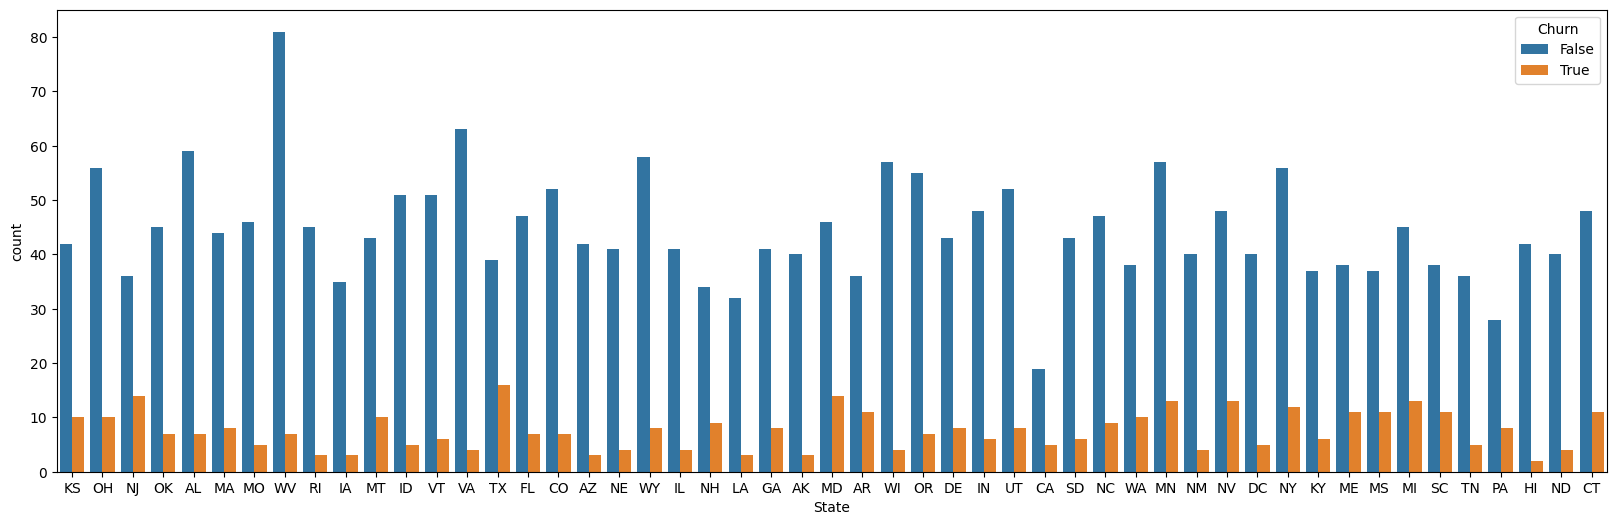

In [17]:
# Count plot of churn rate of all states
plt.figure(figsize=(20,6))
sns.countplot(x='State',data=df,hue='Churn')
plt.show()

<Axes: xlabel='Churn', ylabel='Account length'>

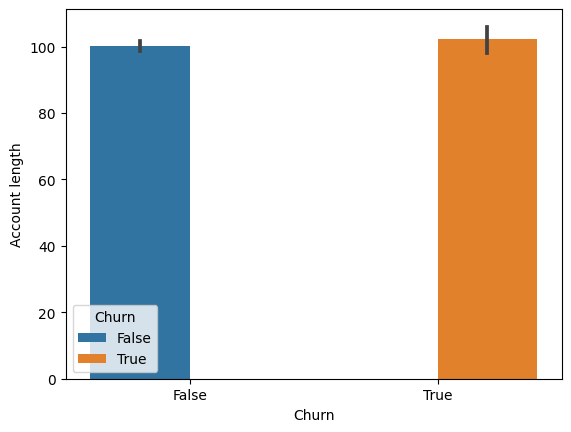

In [19]:
# Barchart for Acoount length and Churn
sns.barplot(hue='Churn', x='Churn', y='Account length',data=df)

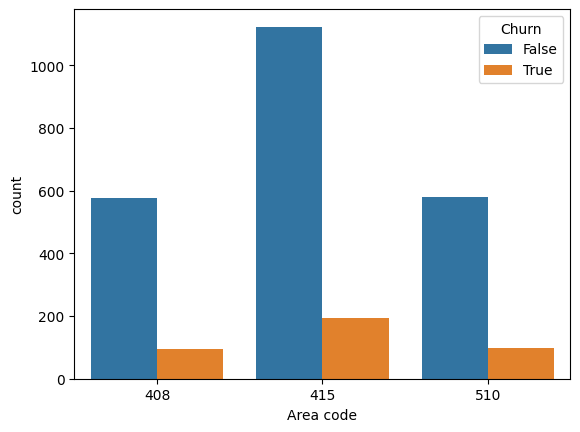

In [21]:
# Count plot between Area code and Churn
sns.countplot(x='Area code',data=df,hue='Churn')
plt.show()

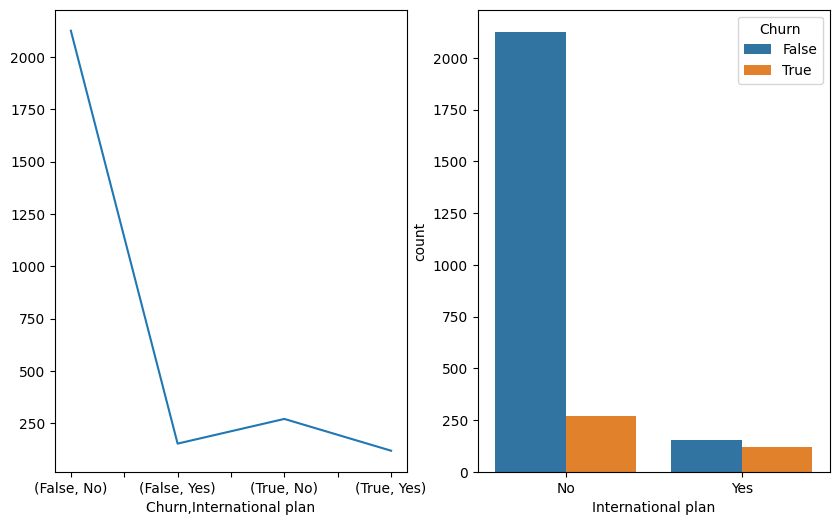

In [22]:
# Plot for relation between Churn and International plan
f,(a1,a2) = plt.subplots(1,2,figsize=(10,6))

df.groupby(['Churn', 'International plan']).size().plot(ax=a1)

sns.countplot(x='International plan',data=df,hue='Churn', ax=a2)

plt.show()

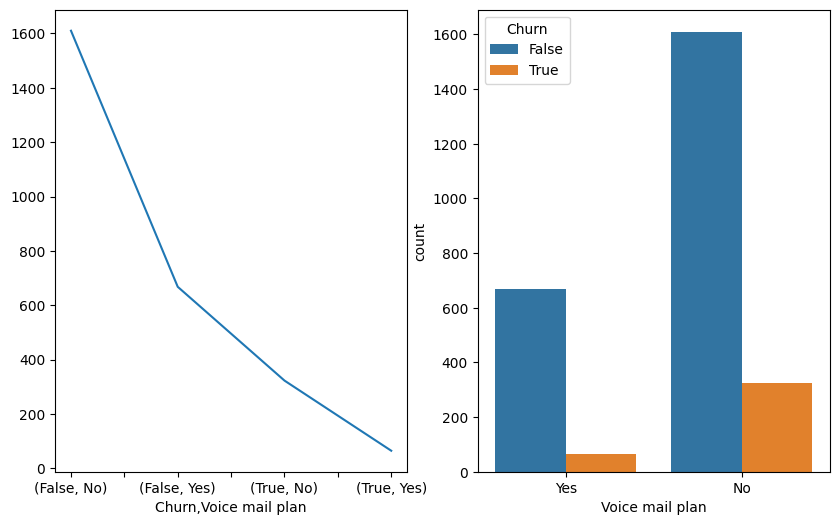

In [23]:
# Plot for relation between Churn and Voice mail plan
f,(a1,a2) = plt.subplots(1,2,figsize=(10,6))

df.groupby(['Churn', 'Voice mail plan']).size().plot(ax=a1)

sns.countplot(x='Voice mail plan',data=df,hue='Churn', ax=a2)

plt.show()

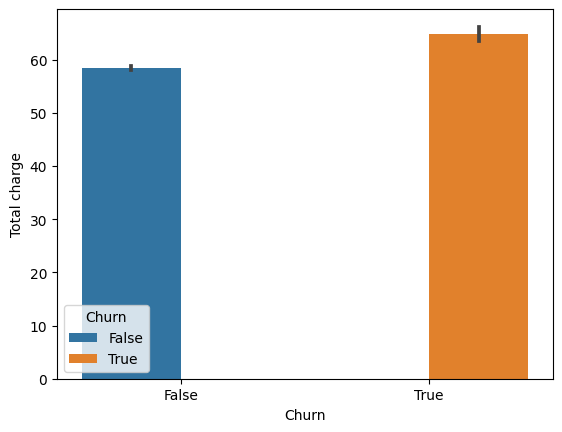

In [27]:
# Plot for total charge and churn
df['Total charge'] = df['Total day charge'] + df['Total eve charge'] + df['Total night charge'] + df['Total intl charge']
sns.barplot(data=df,x='Churn',y='Total charge',hue='Churn')
plt.show()

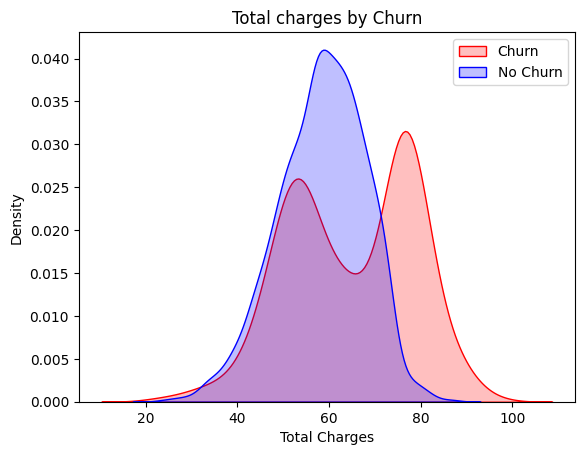

In [28]:
#Total charges by Churn

t = sns.kdeplot(df['Total charge'][(df['Churn'] == True)], color='Red', fill=True)
t = sns.kdeplot(df['Total charge'][(df['Churn'] == False)], ax=t, color='Blue', fill=True)
t.legend(['Churn','No Churn'], loc='upper right')
t.set_ylabel('Density')
t.set_xlabel('Total Charges')
t.set_title('Total charges by Churn')
plt.show()

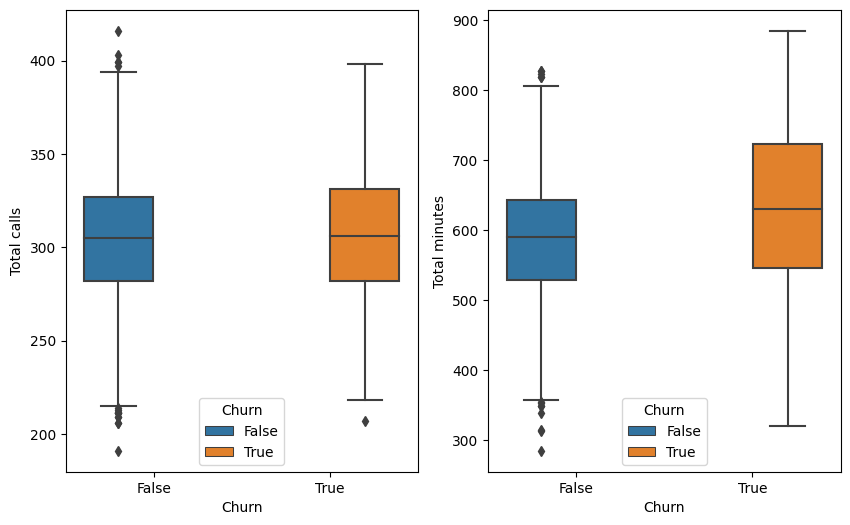

In [32]:
# Plot for Call, Minutes and Churn
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,6))

df['Total calls'] = df['Total day calls'] + df['Total eve calls'] + df['Total night calls'] + df['Total intl calls']
sns.boxplot(data=df,x='Churn',y='Total calls',hue='Churn', ax=ax1)

df['Total minutes'] = df['Total day minutes'] + df['Total eve minutes'] + df['Total night minutes'] + df['Total intl minutes']
sns.boxplot(data=df,x='Churn',y='Total minutes',hue='Churn', ax=ax2)
plt.show()

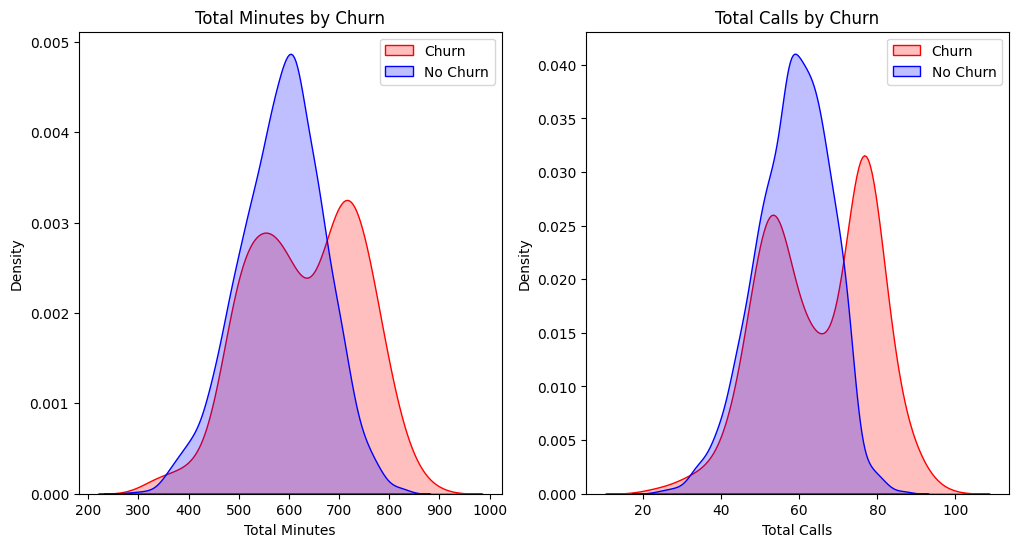

In [35]:
# Total Minutes and Calls by Churn 

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,6))

mins = sns.kdeplot(df['Total minutes'][(df['Churn'] == True)], color='Red', fill=True, ax=ax1)
mins = sns.kdeplot(df['Total minutes'][(df['Churn'] == False)], color='Blue', fill=True, ax=ax1)
mins.legend(['Churn','No Churn'], loc='upper right')
ax1.set_ylabel('Density')
ax1.set_xlabel('Total Minutes')
ax1.set_title('Total Minutes by Churn')

call = sns.kdeplot(df['Total charge'][(df['Churn'] == True)], color='Red', fill=True, ax=ax2)
call = sns.kdeplot(df['Total charge'][(df['Churn'] == False)], color='Blue', fill=True, ax=ax2)
call.legend(['Churn','No Churn'], loc='upper right')
ax2.set_ylabel('Density')
ax2.set_xlabel('Total Calls')
ax2.set_title('Total Calls by Churn')
plt.show()

In [36]:
df['Customer service calls'].value_counts()

Customer service calls
1    945
2    608
0    555
3    348
4    133
5     49
6     17
7      8
9      2
8      1
Name: count, dtype: int64

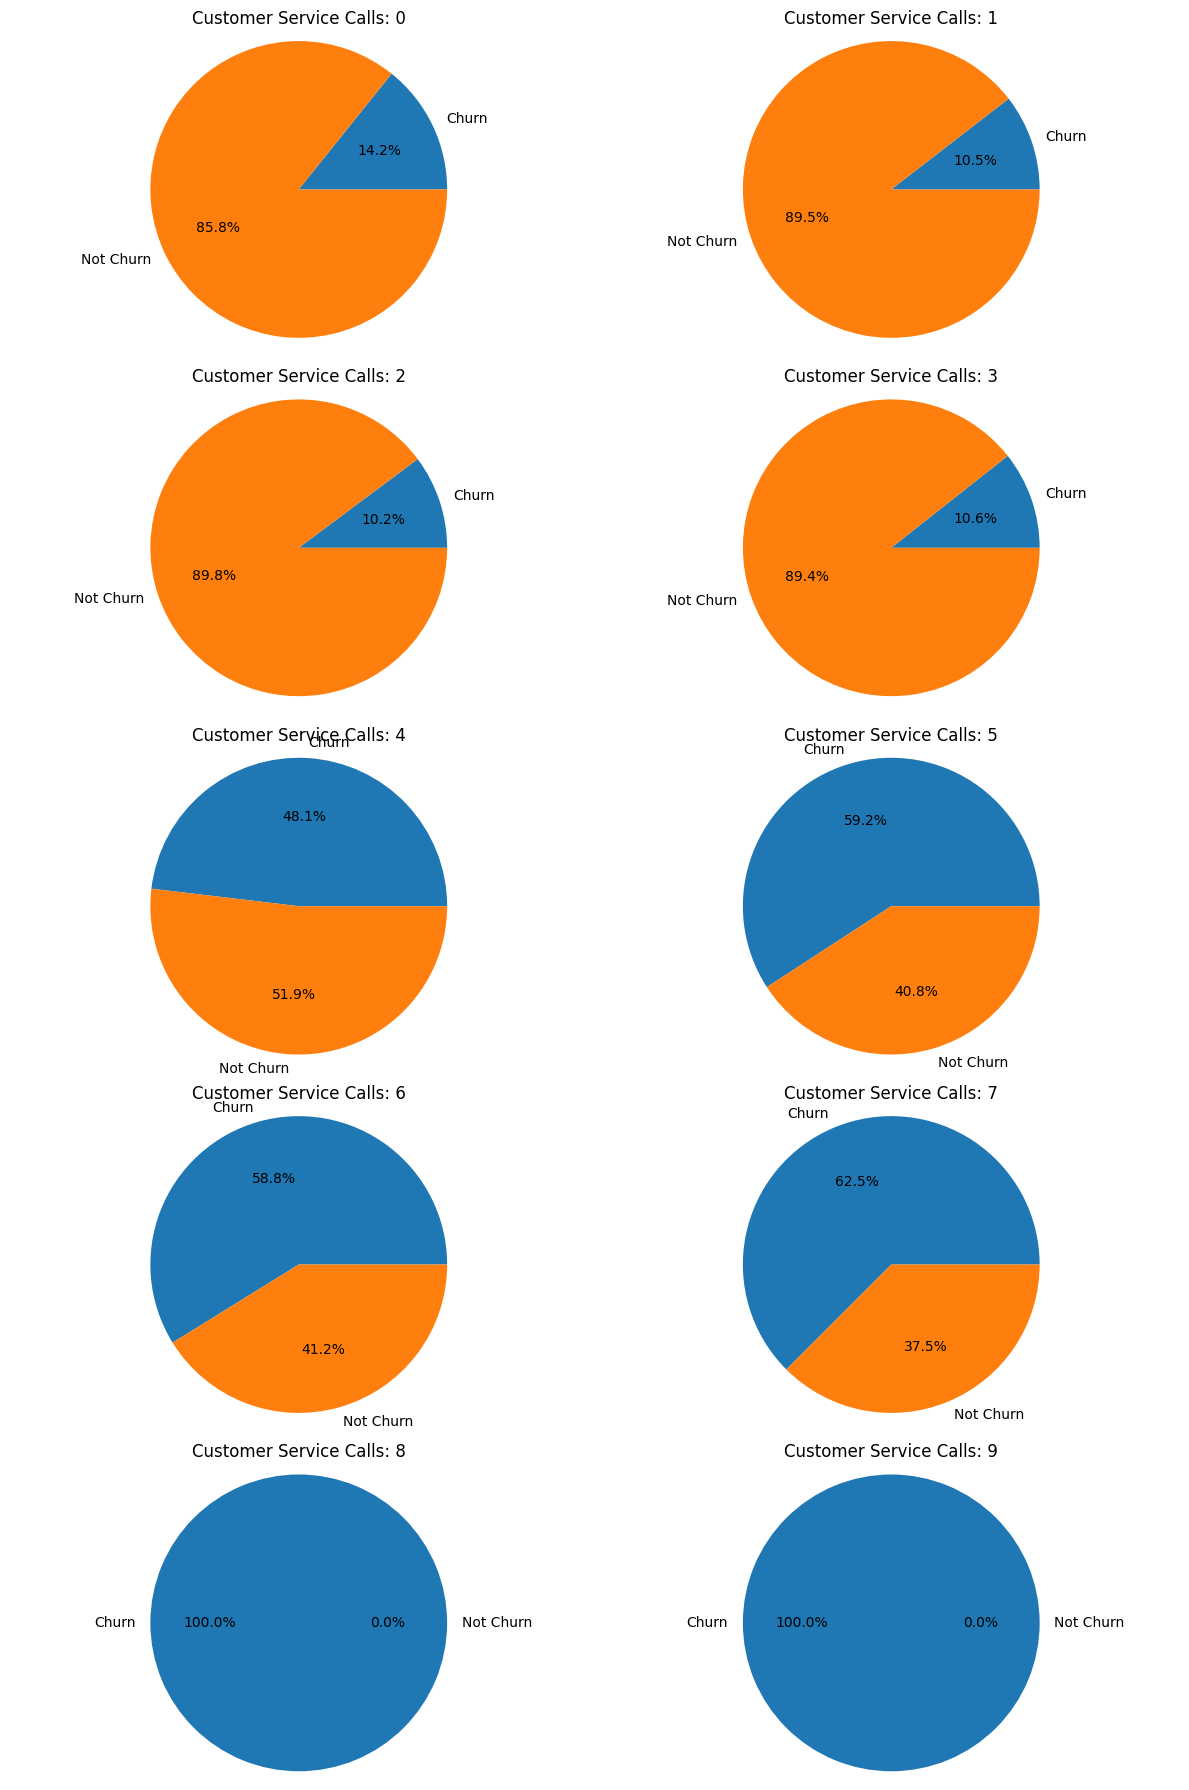

In [37]:
# Chart churn percent on number of service calls

churn_percentage = []
for i in range(10):
    churn_count = len(df[(df['Customer service calls'] == i) & (df['Churn'] == True)])
    total = len(df[df['Customer service calls'] == i])
    churn_percentage.append(churn_count / total * 100)

fig, axs = plt.subplots(5, 2, figsize=(12, 18))
axs = axs.flatten()

for i in range(10):
    labels = ['Churn', 'Not Churn']
    sizes = [churn_percentage[i], 100 - churn_percentage[i]]
    
    axs[i].pie(sizes, labels=labels, autopct='%1.1f%%')
    axs[i].set_title('Customer Service Calls: {}'.format(i))
    axs[i].axis('equal')

plt.tight_layout()
plt.show()

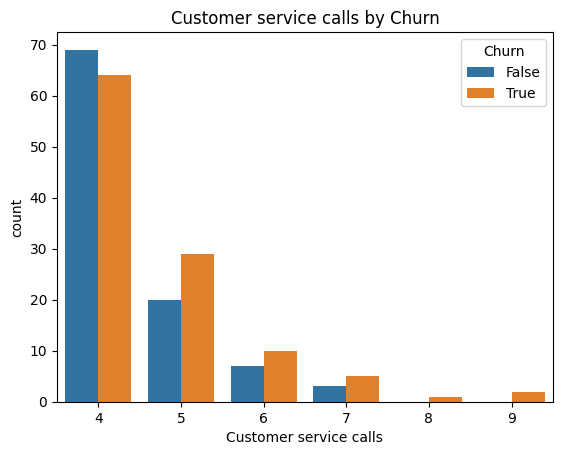

In [39]:
filtered_data = df[df['Customer service calls'].isin(range(4, 10))]

# Countplot for filtered customer service calls
sns.countplot(data=filtered_data, x='Customer service calls', hue='Churn')
plt.title('Customer service calls by Churn')
plt.show()

In [41]:
df1 = df.copy()
df1 = df1.drop(columns = ['Total charge','Total calls','Total minutes'])

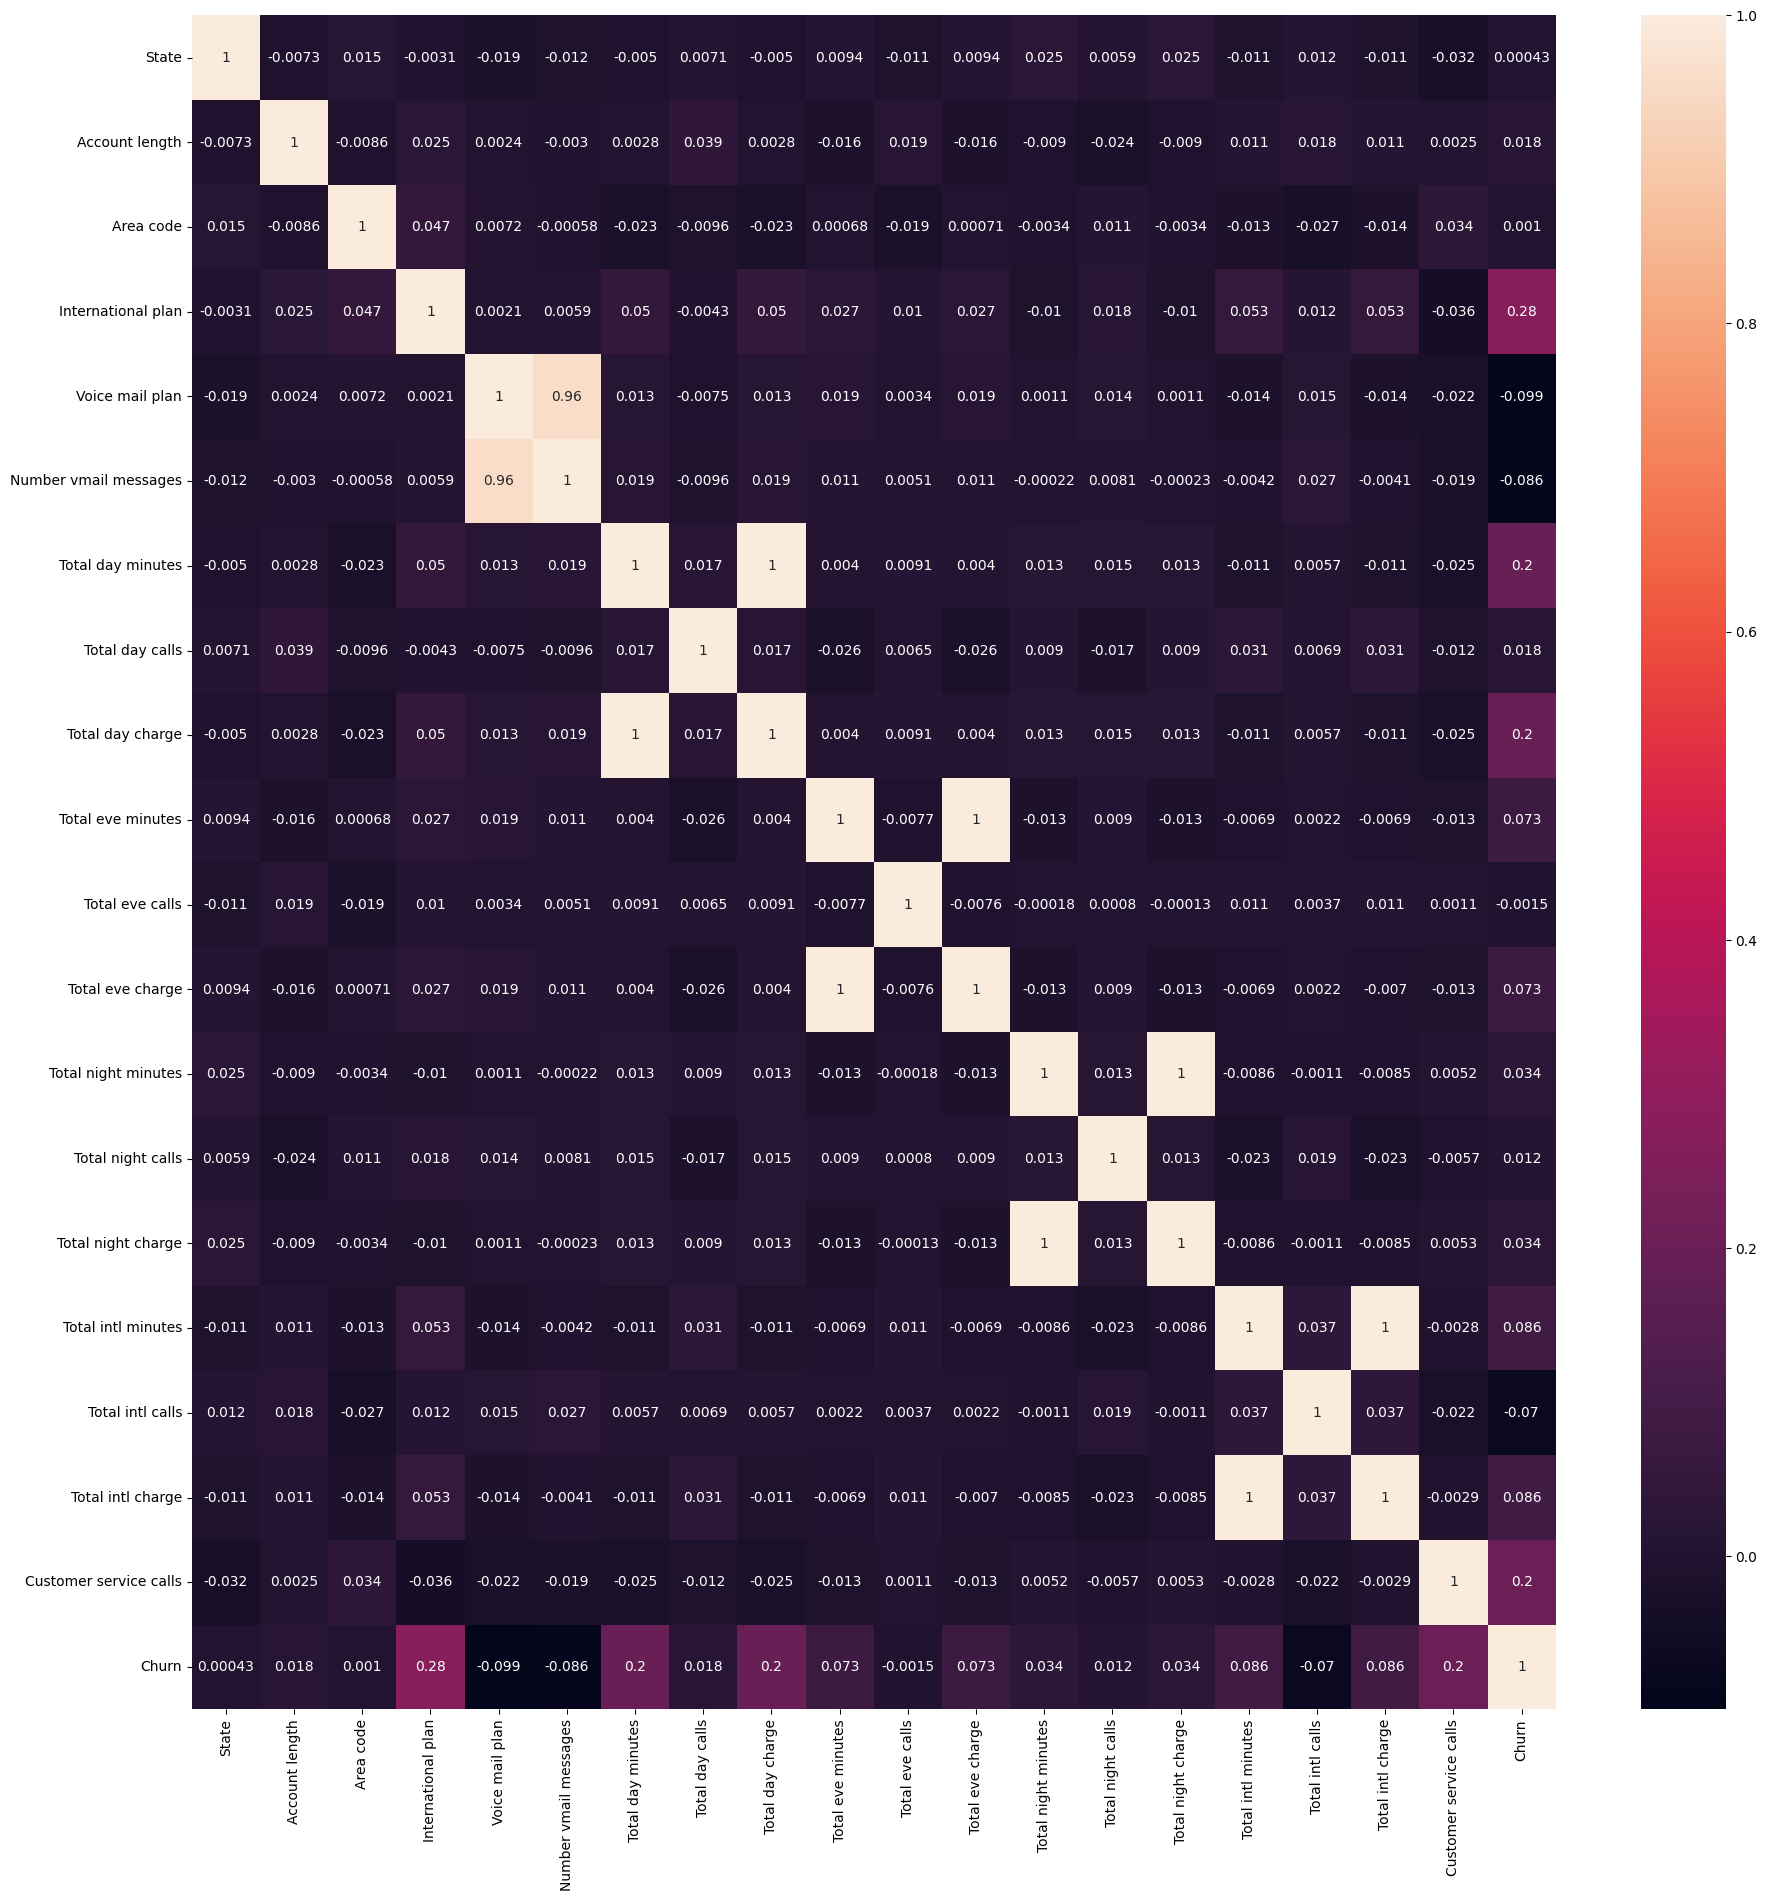

In [42]:
# Heatmap
plt.rcParams["figure.figsize"] = (22,22)
df1['State'] = df1['State'].astype('category').cat.codes
df1['International plan'] = df1['International plan'].astype('category').cat.codes
df1['Voice mail plan'] = df1['Voice mail plan'].astype('category').cat.codes
df1['Churn'] = df1['Churn'].astype('category').cat.codes

sns.heatmap(df1.corr(), annot=True)
plt.show()

# Data processing

In [43]:
# Drop highly corr and uncessary cols
col_drop = ['State', 'Number vmail messages', 'Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']

df_train = df_train.drop(columns=col_drop)
df_test = df_test.drop(columns=col_drop)

In [44]:
target_col = ["Churn"]

# Number of levels in feature to be a categorical feature
nlevels = 6

# Categorical columns
cat_cols = list(set(df_train.nunique()[df_train.nunique()<nlevels].keys().tolist() 
                    + df_train.select_dtypes(include='object').columns.tolist()))
cat_cols = [x for x in cat_cols if x not in target_col]

# Numerical columns
num_cols = [x for x in df_train.columns if x not in cat_cols + target_col]

# Y/N columns with 2 values
bin_cols = df_train.nunique()[df_train.nunique() == 2].keys().tolist()

# Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

# Label encoding bin_cols
le = LabelEncoder()
for i in bin_cols:
    df_train[i] = le.fit_transform(df_train[i])
    df_test[i] = le.transform(df_test[i])

df_train = pd.get_dummies(data = df_train, columns = multi_cols, dtype=int)
df_test = pd.get_dummies(data = df_test, columns = multi_cols, dtype=int)


# Scaling num_cols
# --------- StandardScaler FOR EXP 01 & 02
scaler = StandardScaler()
# --------- MinMaxScaler FOR EXP 03 & 04
# scaler = MinMaxScaler()

scaled = scaler.fit_transform(df_train[num_cols])
scaled = pd.DataFrame(scaled, columns=num_cols)

scaled_test = scaler.transform(df_test[num_cols])
scaled_test = pd.DataFrame(scaled_test, columns=num_cols)

# Drop original values & merge scaled values for num_cols
df_train = df_train.drop(columns = num_cols, axis = 1)
df_train = df_train.merge(scaled, left_index=True, right_index=True, how = "left")

df_test = df_test.drop(columns = num_cols, axis = 1)
df_test = df_test.merge(scaled_test, left_index=True, right_index=True, how = "left")

In [45]:
print(df_train.shape)
print(df_test.shape)

(2666, 16)
(667, 16)


In [46]:
X_train = df_train.drop("Churn", axis=1)
y_train = df_train['Churn']
X_test = df_test.drop("Churn", axis=1)
y_test = df_test['Churn']

In [47]:
# Upsampling - SKIP THIS FOR EXP 01 & 03
from imblearn.over_sampling import SMOTE

sm=SMOTE(k_neighbors=5)
X_train, y_train = sm.fit_resample(X_train, y_train)

# Training model

In [48]:
# AdaBoost
adaboost = ensemble.AdaBoostClassifier()
adaboost.fit(X_train, y_train)
y_pred = adaboost.predict(X_test)

print(classification_report( y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       572
           1       0.52      0.67      0.59        95

    accuracy                           0.87       667
   macro avg       0.73      0.79      0.75       667
weighted avg       0.88      0.87      0.87       667



In [49]:
# Gradient Boosting
gboost = ensemble.GradientBoostingClassifier()
gboost.fit(X_train, y_train)
y_pred = gboost.predict(X_test)

print(classification_report( y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       572
           1       0.79      0.77      0.78        95

    accuracy                           0.94       667
   macro avg       0.88      0.87      0.87       667
weighted avg       0.94      0.94      0.94       667



In [50]:
# Xgboost
xgb = xgb.XGBClassifier(random_state=42, n_estimators = 10)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
print(classification_report( y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       572
           1       0.80      0.82      0.81        95

    accuracy                           0.95       667
   macro avg       0.89      0.89      0.89       667
weighted avg       0.95      0.95      0.95       667



In [51]:
# RFC
random_forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report( y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       572
           1       0.79      0.74      0.76        95

    accuracy                           0.93       667
   macro avg       0.87      0.85      0.86       667
weighted avg       0.93      0.93      0.93       667



In [52]:
# SVC
svc_cl = SVC(kernel = 'rbf', random_state = 0)
svc_cl.fit(X_train, y_train)
y_pred = svc_cl.predict(X_test)

print(classification_report( y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       572
           1       0.65      0.68      0.67        95

    accuracy                           0.90       667
   macro avg       0.80      0.81      0.80       667
weighted avg       0.90      0.90      0.90       667

